# hii.rc.usf.edu /shares usage report

In [1]:
import os
import math
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.mode.chained_assignment = None

GB = 2**30
TB = 2**40

## Set YYYY-MM datestamp based on environment or use default based on date

In [2]:
datestamp = os.environ.get('DATESTAMP', datetime.datetime.today().strftime('%Y-%m'))
datestamp

'2017-07'

## Read in the pipe separated find output of hii.rc.usf.edu:/shares


In [3]:
df = pd.read_csv(f'http://depot.epi.usf.edu/src/countskm/hpcreport/data/find-shares-{datestamp}.psv.bz2',
                 sep='|', dtype=str)
df = df.dropna()
df.bytes = df.bytes.apply(int)

## Extract the group, filename, and file extension creating additional columns

In [4]:
df['group'] = df.path.apply(lambda x: x.split('/')[2])
df['filename'] = df.path.apply(lambda x: x.split('/')[-1])
df['file_ext'] = df.path.apply(lambda x: os.path.splitext(x)[-1])

## Show the head to get an idea of the structure

In [5]:
df.head()

,path,inode,number_links,owner,group,ctime,atime,mtime,bytes,perms,filename,file_ext
0,/shares/hiibroad/tmp/hdf5-1.8.13/README.txt,9688067,1,bayerk,hiibroad,2016-12-22,2016-12-15,2014-05-05,1763,640,README.txt,.txt
1,/shares/hiibroad/tmp/hdf5-1.8.13/fortran/Makef...,9688069,1,bayerk,hiibroad,2016-12-22,2016-12-15,2014-05-05,2043,640,Makefile.am,.am
2,/shares/hiibroad/tmp/hdf5-1.8.13/fortran/CMake...,9688070,1,bayerk,hiibroad,2016-12-22,2016-12-15,2014-05-05,1361,640,CMakeLists.txt,.txt
3,/shares/hiibroad/tmp/hdf5-1.8.13/fortran/COPYING,9688071,1,bayerk,hiibroad,2016-12-22,2016-12-15,2014-05-05,767,640,COPYING,
4,/shares/hiibroad/tmp/hdf5-1.8.13/fortran/testp...,9688073,1,bayerk,hiibroad,2016-12-22,2016-12-15,2014-05-05,1857,640,Makefile.am,.am


## Create columns to levels in the path (/shares/{group}/{level-1}/{level-2}/{level-3})

In [6]:
def custom_split(x, level):
    offset = 2 # to strip off /shares/<group>
    elements = x.split('/')
    if level + offset >= len(elements):
        return None
    else:
        return elements[level + offset]

for level in (1, 2, 3):
    df['level-' + str(level)] = df.path.apply(lambda x: custom_split(x, level))

In [7]:
df_by_group_and_level = df.groupby(['group', 'level-1', 'level-2', 'level-3'])

## Display the top 20 level-3 folder usage in GB 

In [8]:
(df_by_group_and_level.bytes.sum() / GB).round(decimals=2).sort_values(ascending=False).head(20)

group     level-1          level-2           level-3    
hiibroad  data             humann2_medclean  output         71561.59
                           humann2_uniref90  output         53243.13
hii       dataman          teddy             data           22387.56
hii-ut    Uncompressed_v4  Stool_WGS         control        16781.13
hii-uf    DATA             MP152             data_files     13594.67
hii-ut    Data_gz          STOOL-WGS-V2      Stool-WGS-1    11518.29
                           STOOL-WGS-V3      Stool-WGS-1    11512.78
hii-uf    DATA             MP154             data_files     11429.71
                           MP174             data_files     11287.89
hii-ut    Vipie_runs       AA                Stool_WGS      10665.69
hiibroad  data             humann2_medclean  input           9815.61
hii-ut    Data             STOOL-WGS-V2      Stool-WGS-1     9289.12
                           STOOL-WGS-V3      Stool-WGS-1     9284.66
          Vipie_runs       t1d_list1         s

## Filter on bz2 extension (indicates original labdata files) excluding group 'hii'

In [9]:
df_bz2 = df[(df.file_ext == '.bz2') & (df.group != 'hii')]

## Group bz2 usage in similar matter showing top-20 level-3 folder usage in GB

In [10]:
df_bz2_by_group_and_level = df_bz2.groupby(['group', 'level-1', 'level-2', 'level-3'])
(df_bz2_by_group_and_level.bytes.sum() / GB).round(decimals=2).sort_values(ascending=False).head(20)

group     level-1  level-2                           level-3         
hii-uf    DATA     MP152                             data_files          12776.86
                   MP154                             data_files          11427.06
                   MP174                             data_files          11287.89
hiibroad  data     humann2_medclean                  input                9815.61
hii-ut    Data     STOOL-WGS-V2                      Stool-WGS-1          9289.12
                   STOOL-WGS-V3                      Stool-WGS-1          9284.66
                   STOOL-PV-V2                       Stool-PV-7           1098.47
                   STOOL-PV-V3                       Stool-PV-7           1098.31
                   STOOL-WGS-V3                      Stool-WGS-6           578.40
                                                     Stool-WGS-2           435.64
                   STOOL-WGS-V2                      Stool-WGS-2           435.64
                   STOOL-PV-

## Filter on bz2 extension only for group 'hii'

In [11]:
df_bz2_hii = df[(df.file_ext == '.bz2') & (df.group == 'hii')]

In [12]:
df_bz2_hii_by_group_and_level = df_bz2.groupby(['group', 'level-1', 'level-2', 'level-3'])
(df_bz2_hii_by_group_and_level.bytes.sum() / GB).round(decimals=2).sort_values(ascending=False).head(20)

group     level-1  level-2                           level-3         
hii-uf    DATA     MP152                             data_files          12776.86
                   MP154                             data_files          11427.06
                   MP174                             data_files          11287.89
hiibroad  data     humann2_medclean                  input                9815.61
hii-ut    Data     STOOL-WGS-V2                      Stool-WGS-1          9289.12
                   STOOL-WGS-V3                      Stool-WGS-1          9284.66
                   STOOL-PV-V2                       Stool-PV-7           1098.47
                   STOOL-PV-V3                       Stool-PV-7           1098.31
                   STOOL-WGS-V3                      Stool-WGS-6           578.40
                                                     Stool-WGS-2           435.64
                   STOOL-WGS-V2                      Stool-WGS-2           435.64
                   STOOL-PV-

## Calculate size in TB of all bz2 excluding group 'hii'

In [13]:
df_bz2_tb = df_bz2.bytes.sum() / TB
round(df_bz2_tb)

67.0

## Calculate size in TB of all bz2 excluding group 'hii'

In [14]:
df_bz2_hii_tb = df_bz2_hii.bytes.sum() / TB
round(df_bz2_hii_tb)

14.0

## Wastage due to moving from /hiidata to /shares (%):

In [15]:
print("{:.0%}".format(df_bz2_tb / df_bz2_hii_tb)); print

475%


<function print>

## Split into groups and show total usage in TB by group

In [16]:
dfg = df.groupby('group')

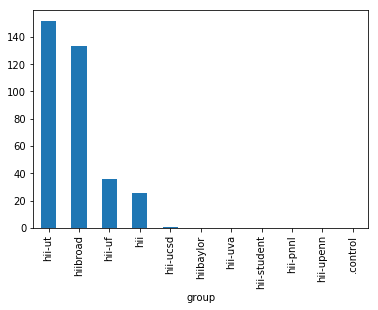

In [17]:
(dfg.bytes.sum() / TB).sort_values(ascending=False).plot.bar()

## Show number of files by file extension (blank indicates no extension)

In [18]:
df_by_file_ext = df.groupby('file_ext')

In [19]:
df_by_file_ext.path.count().sort_values(ascending=False).head(20)

file_ext
.fa             1054803
.bz2             894034
.tsv             374299
.gz              335568
                 321791
.txt             271495
.fastq           185254
.html            175274
.logfile         171889
.py              129753
.zip             128501
.sam             114930
.log             106382
.csv              98386
.fastqsanger      90656
.pickle           89392
.out              81057
.pac              75748
.sa               74464
.bwt              74464
Name: path, dtype: int64

## Show usage in TB by file extension (blank indicates no extension)

In [20]:
(df_by_file_ext.bytes.sum().sort_values(ascending=False) / TB).round(decimals=2).head(20)

file_ext
.fastq          84.32
.bz2            81.68
.sam            63.05
.gz             39.57
.bam            30.44
.dist           10.06
.pickle          7.99
.fa              7.42
                 6.19
.fastqsanger     4.42
.align           2.28
.csv             2.18
.tsv             0.93
.txt             0.89
.markers         0.83
.tif             0.64
.map             0.63
.fq              0.52
.tsv_orig        0.46
.zip             0.40
Name: bytes, dtype: float64